In [21]:
from PIL import Image
import glob
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import pandas as pd
from sklearn.model_selection import train_test_split


In [3]:
shoe_images = glob.glob("./shoe-imgs/*/*.*")

In [6]:
len(shoe_images)

2400

In [18]:
def sample_images(image_paths, num_samples=20):
    """ Plots some samples from the dataset """
    sample_images = np.random.permutation(image_paths)[:num_samples]
    images = [Image.open(img).resize((224,224)) for img in sample_images]


    fig = plt.figure(figsize=(15., 10.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                    nrows_ncols=(5, 4),  # creates 2x2 grid of axes
                    axes_pad=0.1,  # pad between axes in inch.
                    )

    for ax, im in zip(grid, images):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)

    plt.show()

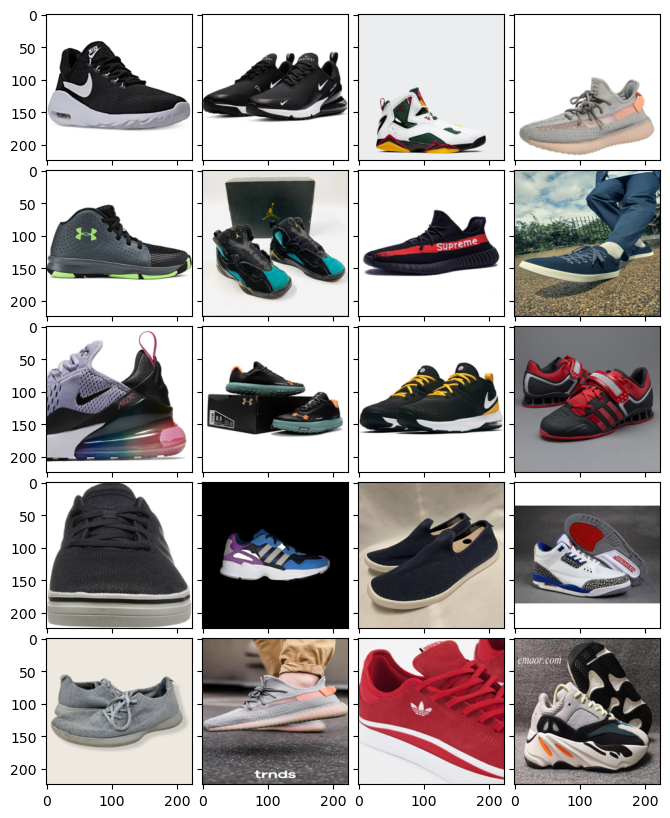

In [19]:
sample_images(shoe_images)

In [24]:
df = pd.DataFrame(data={"file_path":shoe_images})
train, test = train_test_split(df, test_size=0.2)

In [25]:
train.to_csv("shoe_train.csv", index=False)
test.to_csv("shoe_test.csv", index=False)